# Powerplay vs Total Score Patterns

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('../Data/selected_data/merged_data.csv')
data.describe()

C:\Users\kaush\AppData\Local\Temp\ipykernel_2460\1034898893.py:6: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('../Data/selected_data/merged_data.csv')


,Unnamed: 0,runs_by_bat,extra_runs,total_runs_delivery,current_team_total,runs_remain,batter_runs,balls_faced,wickets_fallen,delivery,over,innings,year,month,final_team_total
count,217242.000000,217242.000000,217242.000000,217242.000000,217242.000000,217117.000000,217242.000000,217242.000000,217242.000000,217242.000000,217242.000000,217242.000000,217242.000000,217242.000000,217242.000000
mean,58.990656,1.224077,0.070336,1.294414,73.723217,88.342751,16.977679,13.807915,2.679233,3.624690,10.062437,1.476740,2016.900839,6.480731,153.933991
std,35.160852,1.600601,0.348809,1.588189,48.397965,55.651093,17.765433,11.830359,2.213450,1.816367,5.655411,0.503005,5.015507,3.585855,34.386642
min,0.000000,0.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,2005.000000,1.000000,1.000000
25%,29.000000,0.000000,0.000000,0.000000,34.000000,48.000000,4.000000,5.000000,1.000000,2.000000,5.000000,1.000000,2013.000000,3.000000,132.000000
50%,58.000000,1.000000,0.000000,1.000000,69.000000,89.000000,11.000000,10.000000,2.000000,4.000000,10.000000,1.000000,2018.000000,7.000000,153.000000
75%,89.000000,1.000000,0.000000,1.000000,108.000000,129.000000,25.000000,20.000000,4.000000,5.000000,15.000000,2.000000,2021.000000,10.000000,176.000000
max,136.000000,7.000000,5.000000,8.000000,278.000000,276.000000,172.000000,77.000000,11.000000,12.000000,20.000000,6.000000,2024.000000,12.000000,278.000000


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217242 entries, 0 to 217241
Data columns (total 31 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Unnamed: 0           217242 non-null  int64  
 1   batter               217242 non-null  object 
 2   bowler               217242 non-null  object 
 3   non_striker          217242 non-null  object 
 4   runs_by_bat          217242 non-null  int64  
 5   extra_runs           217242 non-null  int64  
 6   total_runs_delivery  217242 non-null  int64  
 7   current_team_total   217242 non-null  int64  
 8   runs_remain          217117 non-null  float64
 9   batter_runs          217242 non-null  int64  
 10  balls_faced          217242 non-null  int64  
 11  wickets_fallen       217242 non-null  int64  
 12  delivery             217242 non-null  int64  
 13  over                 217242 non-null  int64  
 14  extra_type           217242 non-null  object 
 15  wicket_type      

In [50]:
# Only keep the columns we need
columns_needed = ['current_team_total', 'final_team_total', 'over', 'delivery', 'wickets_fallen', 'match_id', 'innings', 'year']
powerplay_data = data[columns_needed]
powerplay_data.head()



# problem - we need to get the current score at the end of the powerplay
# i.e that is the end last delivery of the 5th over. which is not always the 6th delivery of the 5th over
# select the highest delivery number of the 5th over for each match_id and innings

gp = powerplay_data[powerplay_data['over']  == 5].groupby(['match_id', 'innings',])
powerplay_data = gp.apply(lambda x: x[x['delivery'] == x['delivery'].max()])

# Now we have the data we need
# we don't need the grouping anymore
powerplay_data = powerplay_data.reset_index(drop=True)

# Drop the over and delivery columns
powerplay_data = powerplay_data.drop(['over', 'delivery'], axis=1)

# change the current_team_total column to powerplay_score
powerplay_data = powerplay_data.rename(columns={'current_team_total': 'powerplay_score'})

# Data is ready for analysis
powerplay_data.head()

,powerplay_score,final_team_total,wickets_fallen,match_id,innings,year
0,42,167,0,Afghanistan_Bangladesh_2018-06-03,1,2018
1,34,122,2,Afghanistan_Bangladesh_2018-06-03,2,2018
2,35,145,0,Afghanistan_Bangladesh_2018-06-07,1,2018
3,31,144,1,Afghanistan_Bangladesh_2018-06-07,2,2018
4,37,154,3,Afghanistan_Bangladesh_2023-07-14,1,2023


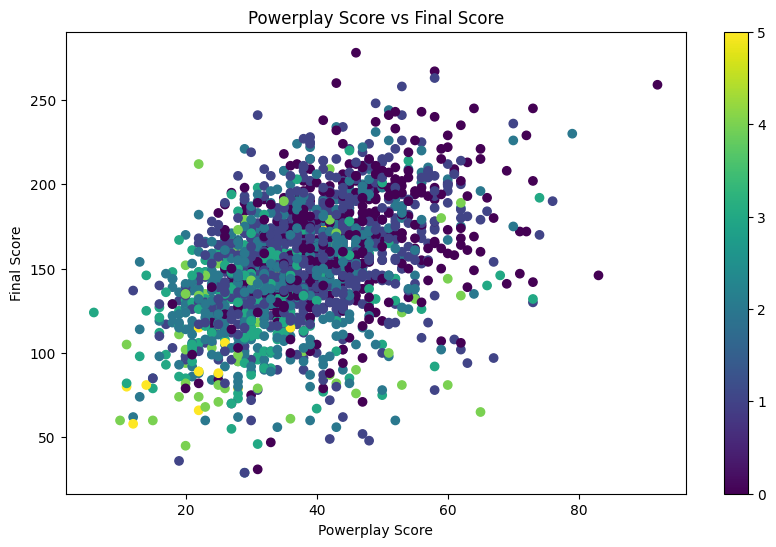

In [52]:
# hypotheis - the powerplay score and wickets fallen has an effect on the final score
# i.e the higher the powerplay score and loweer the wickets fallen, the higher the final score

# Let's plot the data
plt.figure(figsize=(10, 6))
plt.scatter(powerplay_data['powerplay_score'], powerplay_data['final_team_total'], c=powerplay_data['wickets_fallen'], cmap='viridis')
plt.xlabel('Powerplay Score')
plt.ylabel('Final Score')
plt.title('Powerplay Score vs Final Score')
plt.colorbar()
plt.show()


In [53]:
# check the correlation between the variables using the pearson correlation without the match_id, innnings and year columns
powerplay_data[['powerplay_score', 'final_team_total', 'wickets_fallen']].corr(method='pearson')

,powerplay_score,final_team_total,wickets_fallen
powerplay_score,1.000000,0.447747,-0.347287
final_team_total,0.447747,1.000000,-0.348505
wickets_fallen,-0.347287,-0.348505,1.000000


                            powerplay_score_per_wicket  final_team_total
powerplay_score_per_wicket                    1.000000          0.486852
final_team_total                              0.486852          1.000000


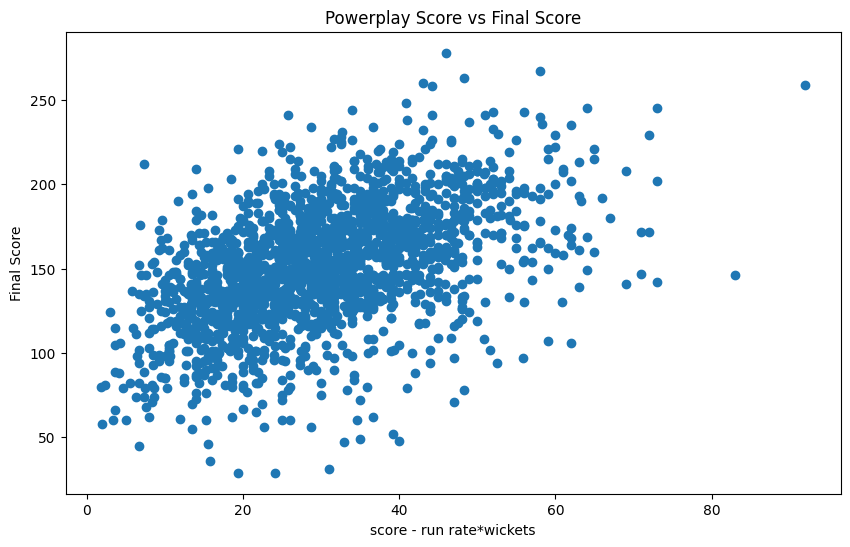

In [92]:
# The correlation between the powerplay score and the final score is 0.447
# The correlation between the wickets fallen and the final score is -0.347



# create a new feature - run rate
powerplay_data['run_rate'] = powerplay_data['powerplay_score'] / 6

# create a new feature - powerplay score per wicket fallen
powerplay_data['score - run_rate * wickets'] = powerplay_data['powerplay_score']  - powerplay_data['wickets_fallen'] * powerplay_data['run_rate'] 

# check the correlation between the variables using the pearson correlation without the match_id, innnings and year columns
print(powerplay_data[['powerplay_score_per_wicket', 'final_team_total']].corr(method='pearson'))

# plot the data
plt.figure(figsize=(10, 6))
plt.scatter(powerplay_data['powerplay_score_per_wicket'], powerplay_data['final_team_total'])
plt.xlabel('score - run rate*wickets')
plt.ylabel('Final Score')
plt.title('Powerplay Score vs Final Score')
plt.show()

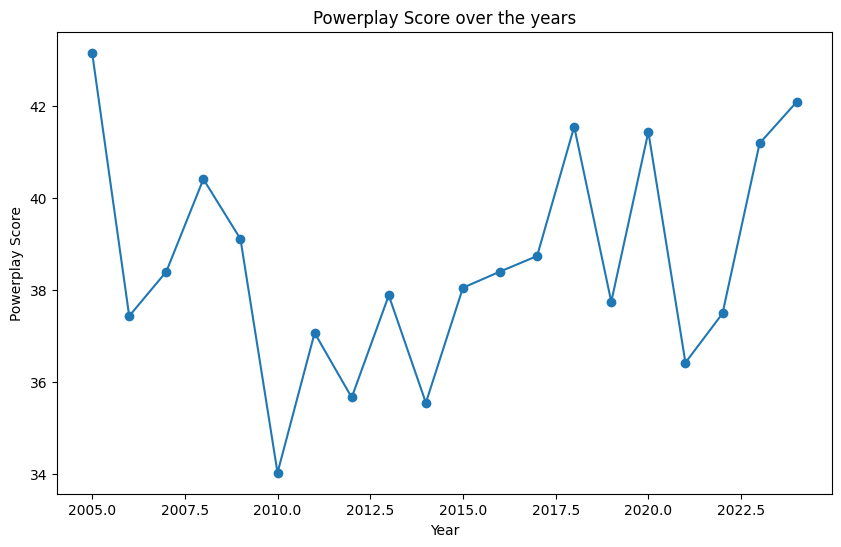

In [95]:
# checking the progression of powerplay score over the years
gp = powerplay_data.groupby('year')
powerplay_data_year = gp['powerplay_score'].mean()

# year is an integer, so plot discrete data
plt.figure(figsize=(10, 6))
plt.plot(powerplay_data_year.index, powerplay_data_year.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Powerplay Score')
plt.title('Powerplay Score over the years')
plt.show()

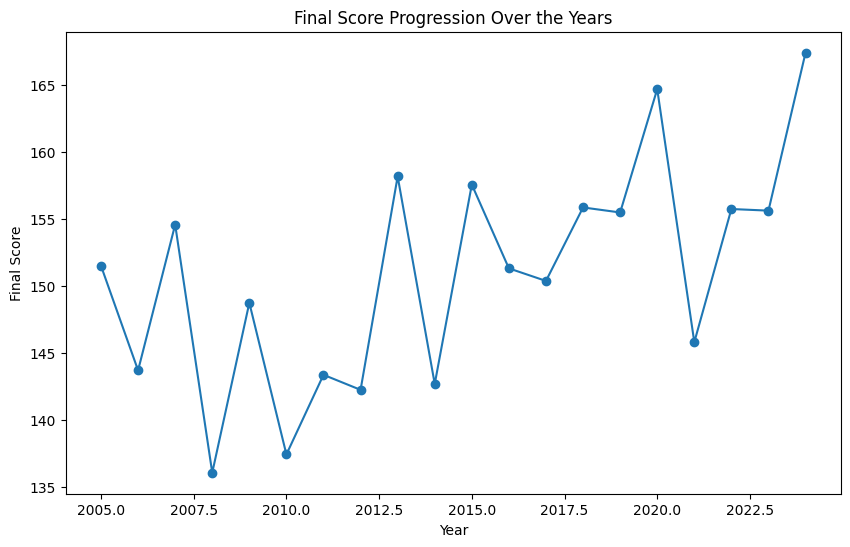

In [96]:
# final score progression over the years
gp = powerplay_data.groupby('year')
final_score_year = gp['final_team_total'].mean()

plt.figure(figsize=(10, 6))
plt.plot(final_score_year.index, final_score_year.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Final Score')
plt.title('Final Score Progression Over the Years')
plt.show()